In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
# Loading the preprocessed iris dataset
file_path = Path("Resources/myopia_data_cleaned.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,1,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,1,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,0,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,0,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,1,-0.996769


In [3]:
# Standarize data with StandarScaler -Redundant
myopia_scaled = StandardScaler().fit_transform(df_myopia)


In [4]:
# Applying PCA to reduce dimensions 

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
#myopia_pca = pca.fit_transform(myopia_scaled)

pca.fit(myopia_scaled)
reduced = pca.transform(myopia_scaled)
myopia_pca = reduced

In [5]:
# Transform PCA data to a DataFrame
myopia_pca = pd.DataFrame(
    data=myopia_pca) 
print(myopia_pca.shape)
myopia_pca.head()

(618, 10)


,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [6]:
# Fetch the explained variance
pca.explained_variance_ratio_.sum()

0.9187361702915184

In [7]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=45)

In [8]:
# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

In [9]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

In [10]:
# Prepare to plot the dataset

# The first column of transformed features
myopia_pca['x'] = tsne_features[:,0]

# The second column of transformed features
myopia_pca['y'] = tsne_features[:,1]

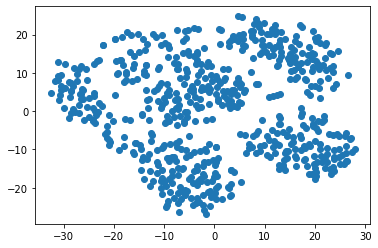

In [11]:
# Visualize the clusters
plt.scatter(myopia_pca['x'], myopia_pca['y'])
plt.show()

In [12]:
df=pd.DataFrame(tsne_features,columns =["one","two"])
df.head()

,one,two
0,-9.137233,17.316441
1,-10.063949,-18.544903
2,15.137856,16.854603
3,12.812168,-1.215060
4,-6.111372,-2.548041


In [13]:
file_path = Path("Resources/dimensionallyreduceddata.csv")
df.to_csv(file_path, index=False)